# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_05_001
## Нелінійна фільтрація. Пороговий фільтр

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

In [2]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im = io.imread(path + filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 786432
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


#### Ахроматичне Зображення

GRAY SHAPE (512, 512, 3) GRAY SIZE 786432


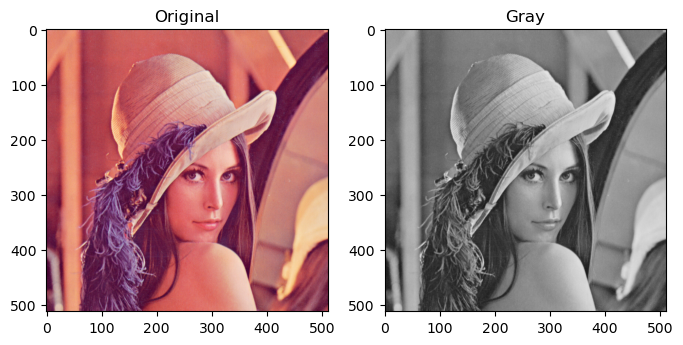

In [5]:
## Визначення напівтоновоного  зображення
image_gray = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
print ('GRAY SHAPE', image_gray.shape, 'GRAY SIZE', image_gray.size)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        image_gray [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]


## СУМІСНИЙ ВХІДНОГО ТА НАПІВТОНОВАНОГО зображеннь
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original")
ax[1].imshow(image_gray)
ax[1].set_title("Gray")
plt.show()

####  Стандартна бінарізація

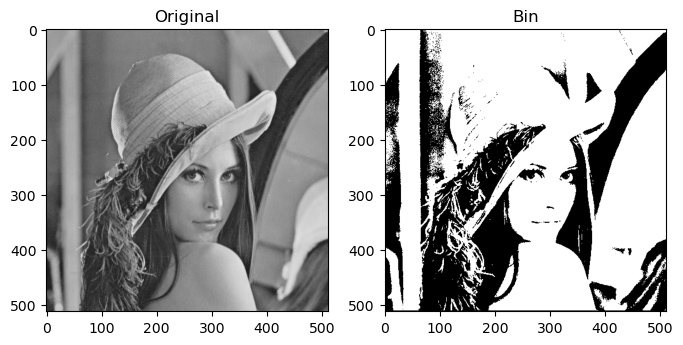

In [7]:
image_bin = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
gamma  = 100

for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        if image_gray [i, j, 0 ] > gamma :
             image_bin [i, j, : ] = [255,255, 255]

fig, axes = plt.subplots(1, 2, figsize=(8, 16))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Original")
ax[1].imshow(image_bin)
ax[1].set_title("Bin")
plt.show()

####  Порогова Фільтрація

In [20]:
# Визначення маски
mask_row = 5
mask_clm = 5
mask_1 = np.zeros ( (mask_row, mask_clm, 1), dtype=np.uint8)

print ('MASK SHAPE', mask_1.shape, 'MASK SIZE', mask_row*mask_clm)
mask_1[0,0] = mask_1[0,1] = mask_1[0,3] = mask_1[4,4] = 0
mask_1[1,0] = mask_1[1,1] = mask_1[1,3] = mask_1[1,4] = 0
mask_1[3,0] = mask_1[3,1] = mask_1[3,3] = mask_1[3,4] = 0
mask_1[4,0] = mask_1[4,1] = mask_1[4,3] = mask_1[4,4] = 0

mask_1[0,2] = mask_1[1,2] = 1
mask_1[3,2] = mask_1[4,2] = 1
mask_1[2,0] = mask_1[2,1] = 1
mask_1[2,3] = mask_1[2,4] = 1
mask_1[2,2] = 1

# MASK TEST
print('МАСКА')
for row in mask_1:
    print(' '.join(map(str, row)))

f_sum = np.sum(mask_1)
Threshold = gamma * f_sum
print ('Сума коефіцієнтів', f_sum, 'Поріг ', Threshold)

MASK SHAPE (5, 5, 1) MASK SIZE 25
МАСКА
[0] [0] [1] [0] [0]
[0] [0] [1] [0] [0]
[1] [1] [1] [1] [1]
[0] [0] [1] [0] [0]
[0] [0] [1] [0] [0]
Сума коефіцієнтів 9 Поріг  900


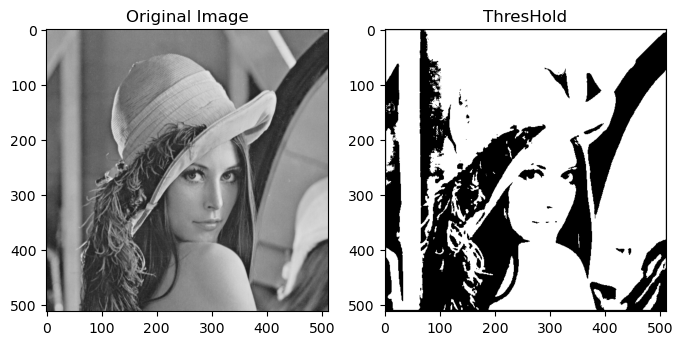

In [21]:
## Визначення файлу перетвореного зображення
image_thres = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)

for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        pixel_value = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                pixel_value += np.uint(image_gray [i-(2-k), j-(2-l), 0]*mask_1[l,k])
        
        if pixel_value > Threshold :
            image_thres [i, j, :] = [255,255,255]

## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Original Image")
ax[1].imshow(image_thres)
ax[1].set_title("ThresHold")
plt.show()

####  Порівняння стандртної бінарізаці та порогової

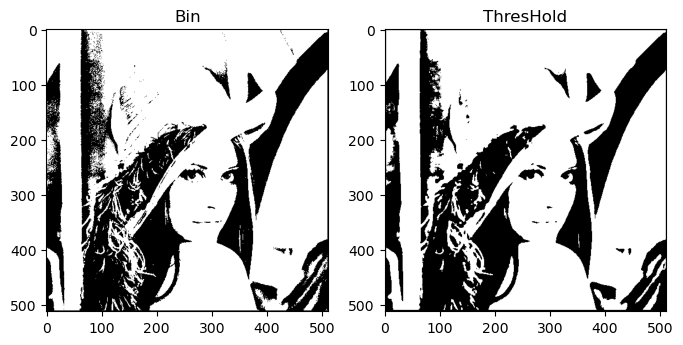

In [22]:
## ПОРІВНЯННЯ

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_bin)
ax[0].set_title("Bin")
ax[1].imshow(image_thres)
ax[1].set_title("ThresHold")
plt.show()

####  Різниця

<function matplotlib.pyplot.show(close=None, block=None)>

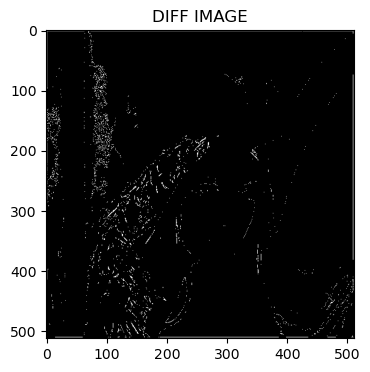

In [34]:
image_substr = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
image_substr [:,:,:] = image_bin [:,:,:]  - image_thres[:,:,:]

plt.figure(figsize=(4, 4))
plt.title('DIFF IMAGE')
plt.imshow(image_substr)
plt.show